# Homework 4: Data Visualization
- **Name**:  [your full name goes here.  remove the brackets.]
- **UB Username**: [your UB username goes here.  remove the brackets]
- **UB Person Number**:  [your UB person number goes here.  remove the brackets]

--- 
## Part 1 - Generate Plots According to Specifications

### Problem 1 - Scatter Plot with a Line

In [1]:
#Import Libreries

%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd

<IPython.core.display.Javascript object>


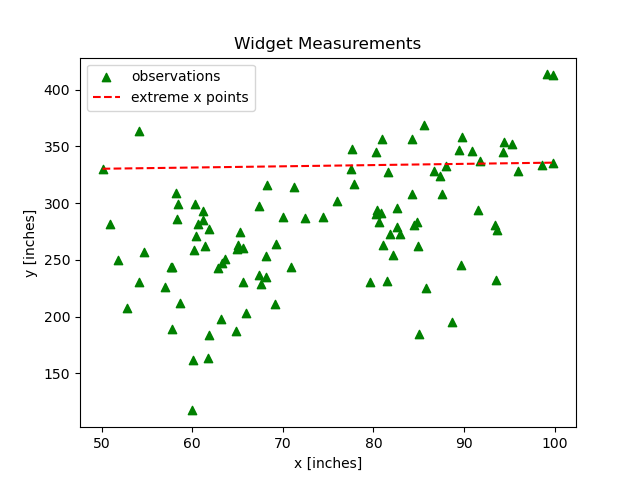

In [2]:
# Load the CSV file, ignoring rows starting with "%"
df = pd.read_csv('scatter_data.csv', comment='%', header=None)

# Extract x and y values
x = df.iloc[:, 0]  # Accessing the first column as x-coordinate
y = df.iloc[:, 1]  # Accessing the second column as y-coordinate

# Scatter plot with green triangles
plt.scatter(x, y, color='green', marker='^', label='observations')

# Find left-most and right-most points
leftmost_point = (x.min(), y[x.idxmin()])
rightmost_point = (x.max(), y[x.idxmax()])

# Draw a red dashed line
plt.plot([leftmost_point[0], rightmost_point[0]], [leftmost_point[1], rightmost_point[1]], 'r--', label='extreme x points')

# Add title and labels
plt.title('Widget Measurements')
plt.xlabel('x [inches]')
plt.ylabel('y [inches]')

# Add legend
plt.legend()

In [3]:
plt.close()

### Problem 2 - Histogram

<IPython.core.display.Javascript object>


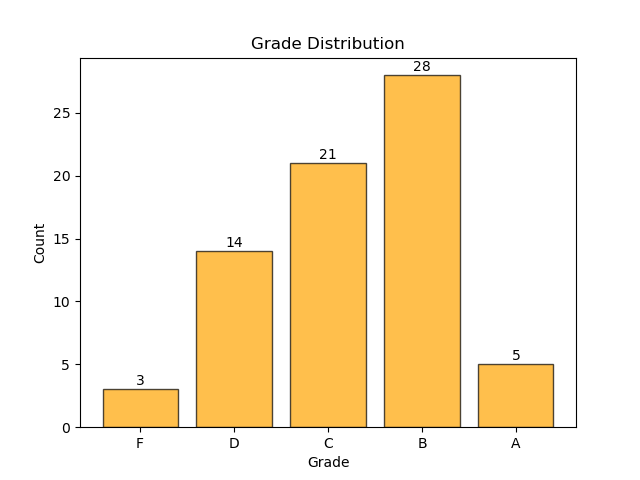

In [4]:
#Import Libreries

import matplotlib.pyplot as plt
import pandas as pd

# Read the data using pandas, ignoring rows starting with "%"
df = pd.read_csv("student_grades.csv", comment='%', header=None, names=['Student ID', 'Average Score'])

# Define the bin edges and labels
bins = [0, 60, 70, 80, 90, 100]
labels = ['F', 'D', 'C', 'B', 'A']

# Use pd.cut to categorize scores into grade bins
df['Grade'] = pd.cut(df['Average Score'], bins=bins, labels=labels, include_lowest=True)

# Count occurrences of each grade
grade_counts = df['Grade'].value_counts()

# Create custom x-coordinates based on labels order
x_coordinates = range(len(labels))

# Create the histogram using plt.bar
plt.bar(x_coordinates, grade_counts[labels], align='center', alpha=0.7,facecolor='orange', edgecolor='black')

# Set labels and title
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Grade Distribution')

# Set xticks and xticklabels based on labels order
plt.xticks(x_coordinates, labels)

# Add counts above each bar
for i, count in enumerate(grade_counts[labels]):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
#print(df)

In [5]:
plt.close()

### Problem 3 - Barplot and Boxplot in the Same Figure

In [6]:
#Import Libreries

import matplotlib.pyplot as plt
import pandas as pd


# Read the data from the CSV file
data = pd.read_csv('solution_data.csv',comment='%', header=None, names=['Problem ID', 'Approach', 'OFV'])

# Step 2: Calculate the optimality gap for each heuristic for each problem type
optimal_ofv = data[data['Approach'] == 'optimal'].set_index('Problem ID')['OFV']

# Create a function to calculate optimality gap
def calculate_optimality_gap(row):
    return ((optimal_ofv[row['Problem ID']] - row['OFV']) / optimal_ofv[row['Problem ID']]) * 100

data['Optimality Gap'] = data.apply(calculate_optimality_gap, axis=1)

In [7]:
# Filter out rows where Approach is not 'optimal'
heuristic_data = data[data['Approach'] != 'optimal']

# Group the data by Approach (heuristic) and calculate the average Optimality Gap
average_optimality_gap = heuristic_data.groupby('Approach')['Optimality Gap'].mean()

<IPython.core.display.Javascript object>


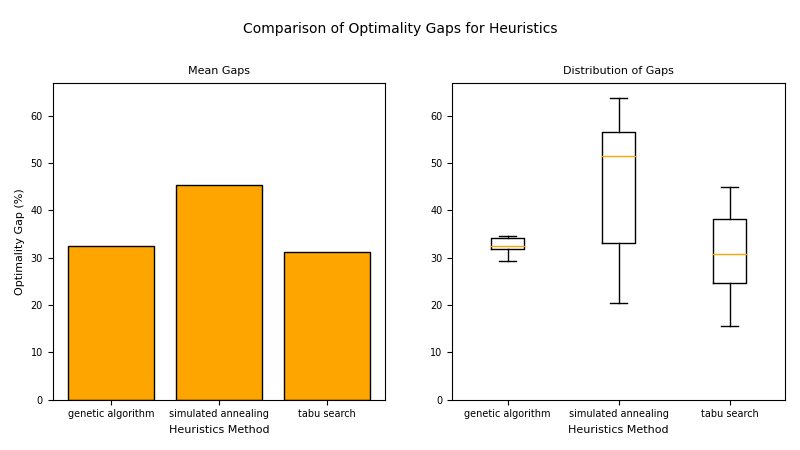

In [8]:
# Filter out rows where Approach is not 'optimal'
heuristic_data = data[data['Approach'] != 'optimal']

# Create a figure with two subplots, sharing the y-axis, and adjust figure size
fig, ( ax1 , ax2 ) = plt.subplots(1, 2, figsize=(8, 4.5), sharey=True)


# Plot the barplot in the first subplot (axs[0])
average_optimality_gap = heuristic_data.groupby('Approach')['Optimality Gap'].mean()
ax1.bar(average_optimality_gap.index, average_optimality_gap.values, color='orange', edgecolor='black', linewidth=1)
ax1.set_xlabel('Heuristics Method', fontsize= 8)
ax1.set_ylabel('Optimality Gap (%)', fontsize= 8)
ax1.set_title('Mean Gaps', fontsize= 8)
ax1.tick_params(axis='x',  labelsize=7)  # Adjust x-axis label font size
ax1.tick_params(axis='y',  labelsize=7)  # Adjust x-axis label font size

# Plot the boxplot in the second subplot (axs[1])
boxplot_data = [heuristic_data[heuristic_data['Approach']=='genetic algorithm']['Optimality Gap'],
                heuristic_data[heuristic_data['Approach']=='simulated annealing']['Optimality Gap'],
                heuristic_data[heuristic_data['Approach']=='tabu search']['Optimality Gap']]
ax2.boxplot(boxplot_data, labels=['genetic algorithm', 'simulated annealing', 'tabu search'], 
               medianprops={'color': 'orange'})
ax2.set_xlabel('Heuristics Method', fontsize= 8)
ax2.set_title('Distribution of Gaps', fontsize= 8)
ax2.tick_params(axis='x',  labelsize=7)  # Adjust x-axis label font size
ax2.tick_params(axis='y', labelleft=True, labelsize=7)  # Adjust y-axis label font size

# Set figure title above subplots
fig.suptitle('Comparison of Optimality Gaps for Heuristics', y=0.95, fontsize=10)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Increase top margin
plt.subplots_adjust(wspace=0.2)  # Adjust wspace (horizontal space) between subplots


In [9]:
plt.close()

--- 
## Part 2 - Explore New Plot Types

[In this space, provide a concise explanation of your plot.  The reader should be able to read this to learn what kind of plot you're about to create, what type of data you're going to plot, and why you believe it is wise to use this type of plot for this type of data.  (replace these instructions with your actual content, and remove the brackets)]

- **URL of Example Code**:  [include a link to the matplotlib or Seaborn example.  remove the brackets]
- **URL of Sample Data**:  [include a link to the sample data you're using.  remove the brackets]

In [10]:
# Problem 4

# Datase: City/ZIP/County/FIPS - Quality of Life (US)
# Link Address: https://www.kaggle.com/datasets/zacvaughan/cityzipcountyfips-quality-of-life/
# This dataset is providing different factors regarding quality of life in different counties on each state in the US
# This homework is using "QOL(County Level).csv" file. 

# Objective: To investigate the correlation between the mean unemployment rate and the percentage of 
#            good Air Quality Index (AQI) readings in different states across the US."
# In this regard the related columns are extracted from datafram and for each state the factors are 
# calculated in term of average 
# Then the average of each state are compared 


#Import Libreries

%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.patches import Ellipse

# Load the dataset
df = pd.read_csv('QOL(County Level).csv')

# Extract the desired columns
selected_columns = df[['LSTATE', 'NMCNTY', 'Unemployment', 'AQI%Good']]


In [11]:

# Convert 'Unemployment' and 'AQI%Good' to numeric
selected_columns['Unemployment'] = selected_columns['Unemployment'].str.rstrip('%').astype('float') / 100.0
selected_columns['AQI%Good'] = selected_columns['AQI%Good'].str.rstrip('%').astype('float') / 100.0

# Group the data by "LSTATE"
grouped_data = selected_columns.groupby('LSTATE')

# Calculate the mean for 'Unemployment' and 'AQI%Good' for each state
state_means = grouped_data[['Unemployment', 'AQI%Good']].mean()

C:\Users\Forough\AppData\Local\Temp\ipykernel_15952\2849631376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['Unemployment'] = selected_columns['Unemployment'].str.rstrip('%').astype('float') / 100.0
C:\Users\Forough\AppData\Local\Temp\ipykernel_15952\2849631376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_columns['AQI%Good'] = selected_columns['AQI%Good'].str.rstrip('%').astype('float') / 100.0


<IPython.core.display.Javascript object>


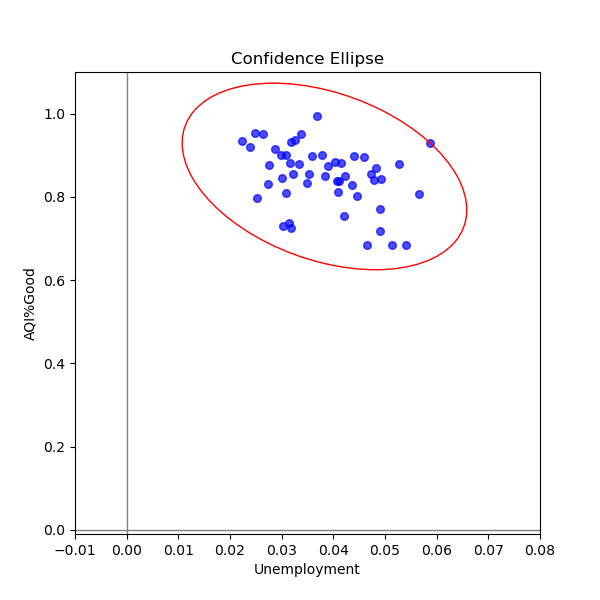

(-0.01, 1.1)

In [12]:
# Define the confidence ellipse function
def confidence_ellipse(x, y, ax, n_std=3.0, **kwargs):
    cov = np.cov(x, y)
    lambda_, v = np.linalg.eigh(cov)
    lambda_ = np.sqrt(lambda_)
    ell = Ellipse(xy=(np.mean(x), np.mean(y)),
                  width=lambda_[0]*n_std*2, height=lambda_[1]*n_std*2,
                  angle=np.degrees(np.arctan2(*v[:,0][::-1])),
                  **kwargs)
    ell.set_facecolor('none')
    ax.add_patch(ell)

fig, ax = plt.subplots(figsize=(6, 6))

x = state_means['Unemployment']
y = state_means['AQI%Good']

ax.scatter(x, y, s=30, color='blue', alpha=0.7)

ax.axvline(c='grey', lw=1)
ax.axhline(c='grey', lw=1)

confidence_ellipse(x, y, ax, edgecolor='red')

ax.set_title("Confidence Ellipse")
ax.set_xlabel("Unemployment")
ax.set_ylabel("AQI%Good")

# Manually adjust limits for x and y axes
ax.set_xlim(-0.01, 0.08)
ax.set_ylim(-0.01, 1.1)

# Conclusion: There is negative correlation between mean of AQI % good and the average rate of unemployment.

[Now, finish up your plot with a Markdown explanation of the key elements of the above code.  It is particularly useful to provide examples of how someone else might want to customize your plot.  For example, perhaps they might want to change colors, font sizes, scales, etc.] 